In [1]:
import pandas as pd
import numpy as np
import json
import ast
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

In [2]:
stream=pd.read_csv("/Users/manindersingh/Documents/Transactional Dataset/click_stream.csv")

In [3]:
transactions=pd.read_csv("/Users/manindersingh/Documents/Transactional Dataset/transactions.csv")

In [4]:
customer=pd.read_csv("/Users/manindersingh/Documents/Transactional Dataset/customer.csv")

In [5]:
product=pd.read_excel("/Users/manindersingh/Documents/Transactional Dataset/product.xlsx")

# EDA Transaction

In [6]:
transactions.head(25)                                           

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753
5,2019-02-03T11:25:55.365620Z,4774,1ed58c46-67fb-4386-924b-983c74ccb4d7,7fa0b583-6d30-40bc-8b61-0f70f5bef30f,"[{'product_id': 59620, 'quantity': 1, 'item_pr...",Debit Card,Success,6369,WEEKENDMANTAP,5000,2019-02-07T10:41:59.997463Z,-3.602334,120.363824,181865
6,2019-03-22T11:53:02.365620Z,4774,c0ced313-e6b1-4a2a-b21f-347eccda5f96,e140f1f1-6da1-42b3-b2d1-56ac6fc72d4a,"[{'product_id': 53136, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2019-03-27T14:40:13.181562Z,-7.712608,110.502877,306599
7,2019-05-08T11:29:21.365620Z,4774,0ed6730f-a5db-4e40-9a54-c343474d872c,e7eff973-b499-4b8d-9892-89e67e5fd7d4,"[{'product_id': 14142, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2019-05-10T20:09:58.104955Z,3.293114,98.857043,153913
8,2019-06-24T12:08:52.365620Z,4774,6edd9366-4788-4bbb-ae5b-744e45e6118d,0d20c278-e082-4f28-9afe-8b5907d7a284,"[{'product_id': 12282, 'quantity': 1, 'item_pr...",Credit Card,Success,4019,AZ2022,10000,2019-06-28T10:34:36.588498Z,-6.126016,106.779552,370757
9,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,"[{'product_id': 53051, 'quantity': 1, 'item_pr...",Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,-0.992004,114.438739,1295740


In [7]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   product_metadata        852584 non-null  object 
 5   payment_method          852584 non-null  object 
 6   payment_status          852584 non-null  object 
 7   promo_amount            852584 non-null  int64  
 8   promo_code              326536 non-null  object 
 9   shipment_fee            852584 non-null  int64  
 10  shipment_date_limit     852584 non-null  object 
 11  shipment_location_lat   852584 non-null  float64
 12  shipment_location_long  852584 non-null  float64
 13  total_amount            852584 non-null  int64  
dtypes: float64(2), int64

In [8]:
transactions['created_at'] = pd.to_datetime(transactions['created_at'])

# Extract date, time, year, and abbreviated month name
transactions['order_date'] = transactions['created_at'].dt.date
transactions['order_time'] = transactions['created_at'].dt.time
transactions['order_year'] = transactions['created_at'].dt.year
transactions['order_month'] = transactions['created_at'].dt.strftime('%b')

In [9]:
transactions['shipment_date_limit'] = pd.to_datetime(transactions['shipment_date_limit'])

# Extract date, time, year, and abbreviated month name
transactions['ship_date'] = transactions['shipment_date_limit'].dt.date
transactions['ship_time'] = transactions['shipment_date_limit'].dt.time

In [10]:
transactions.head(5)

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,order_date,order_time,order_year,order_month,ship_date,ship_time
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,-8.227893,111.969107,199832,2018-07-29,15:22:01.458193,2018,Jul,2018-08-03,05:07:24.812676
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03 01:29:03.415705+00:00,3.013470,107.802514,155526,2018-07-30,12:40:22.365620,2018,Jul,2018-08-03,01:29:03.415705
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18 08:41:49.422380+00:00,-2.579428,115.743885,550696,2018-09-15,11:51:17.365620,2018,Sep,2018-09-18,08:41:49.422380
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05 17:42:27.954235+00:00,-3.602334,120.363824,271012,2018-11-01,11:23:48.365620,2018,Nov,2018-11-05,17:42:27.954235
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23 17:24:07.361785+00:00,-3.602334,120.363824,198753,2018-12-18,11:20:30.365620,2018,Dec,2018-12-23,17:24:07.361785


Failed vs Successfull Transactions

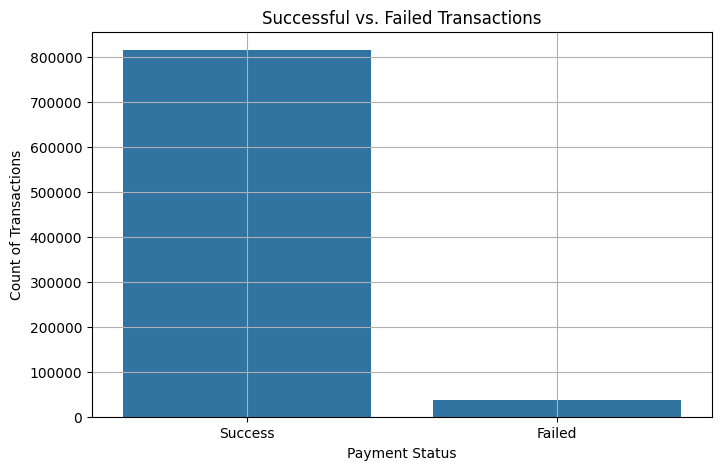

In [11]:
payment_status_counts = transactions['payment_status'].value_counts().reset_index()
payment_status_counts.columns = ['payment_status', 'count']  

plt.figure(figsize=(8, 5))
sns.barplot(data=payment_status_counts, x='payment_status', y='count')
plt.xlabel("Payment Status")
plt.ylabel("Count of Transactions")
plt.title("Successful vs. Failed Transactions")
plt.grid()
plt.show()                                                                                      

Total Sales Revenue Yearly Trend

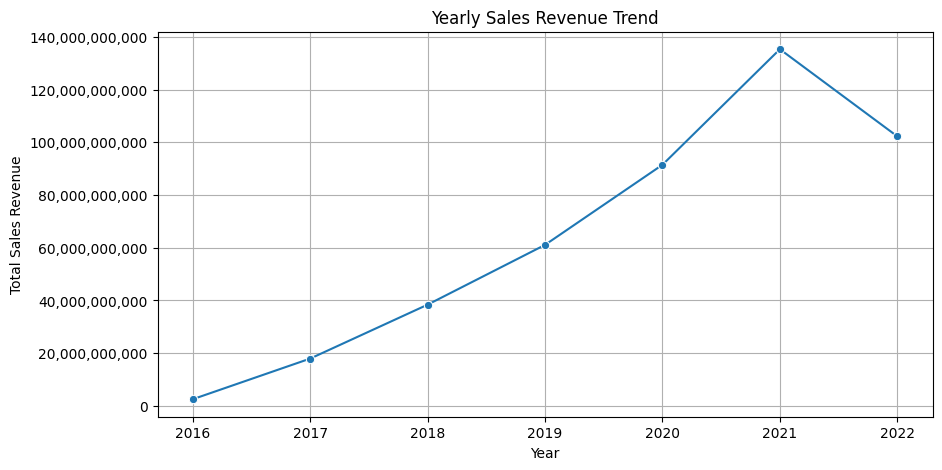

In [12]:
successful_transactions = transactions[transactions['payment_status'] == 'Success']

yearly_sales = successful_transactions.groupby('order_year')['total_amount'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_sales, x='order_year', y='total_amount', marker='o')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel("Year")
plt.ylabel("Total Sales Revenue")
plt.title("Yearly Sales Revenue Trend")
plt.grid()
plt.show()

Monthly Sales Trend Analysis

/var/folders/4s/v2k7bm2d7vl1z46yc265hz3c0000gn/T/ipykernel_84458/3894240016.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales, x='order_month', y='total_amount', palette='viridis')


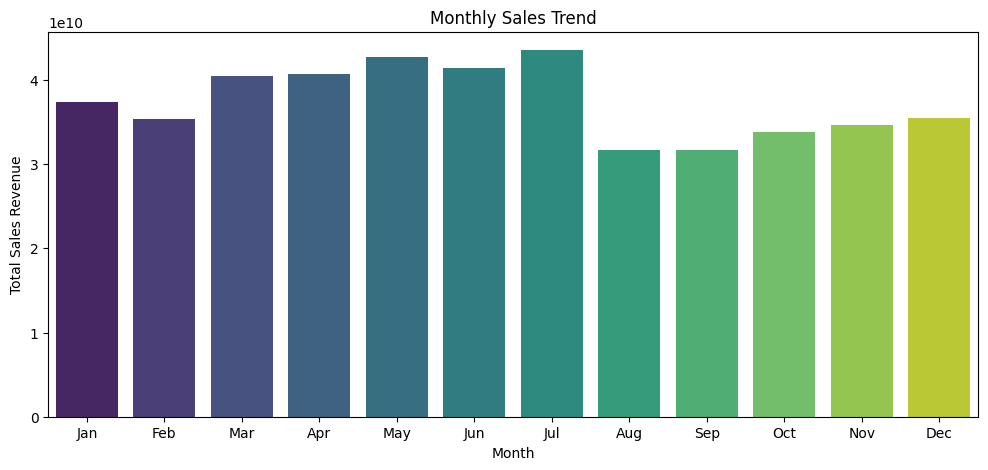

In [13]:
monthly_sales = successful_transactions.groupby('order_month')['total_amount'].sum().reset_index()

# Sort by month order
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
monthly_sales['order_month'] = pd.Categorical(monthly_sales['order_month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values('order_month')
# plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(data=monthly_sales, x='order_month', y='total_amount', palette='viridis')
plt.xlabel("Month")
plt.ylabel("Total Sales Revenue")
plt.title("Monthly Sales Trend")
plt.show()

Top Payment Methods Used

/var/folders/4s/v2k7bm2d7vl1z46yc265hz3c0000gn/T/ipykernel_84458/1799113573.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='coolwarm')


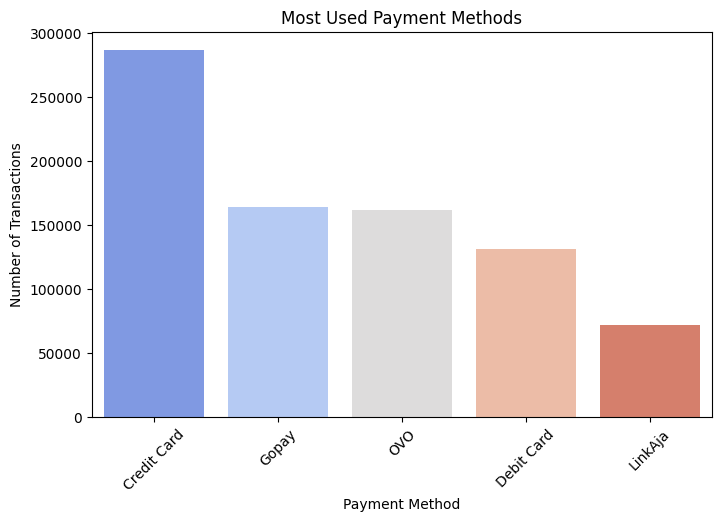

In [14]:
payment_counts = successful_transactions['payment_method'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='coolwarm')
plt.xlabel("Payment Method")
plt.ylabel("Number of Transactions")
plt.title("Most Used Payment Methods")
plt.xticks(rotation=45)
plt.show()

Promo Code Effectivness

In [15]:
promo_usage = transactions["promo_code"].notna().sum()
print(f"Total transactions with a promo code: {promo_usage}")

# Compare sales with and without promo
promo_sales = transactions.groupby(transactions["promo_code"].notna())["total_amount"].sum()
print(promo_sales)                                          

Total transactions with a promo code: 326536
promo_code
False    290223695680
True     178626326489
Name: total_amount, dtype: int64


/var/folders/4s/v2k7bm2d7vl1z46yc265hz3c0000gn/T/ipykernel_84458/4089556201.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promo_impact, x='promo_code', y='total_amount', palette='coolwarm')


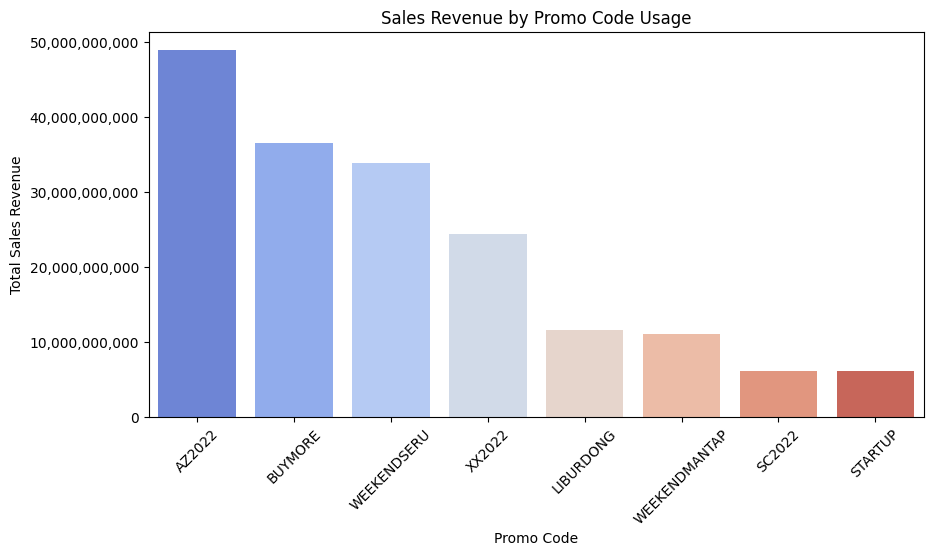

In [16]:
promo_impact = transactions.groupby('promo_code')['total_amount'].sum().reset_index().sort_values('total_amount', ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=promo_impact, x='promo_code', y='total_amount', palette='coolwarm')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xticks(rotation=45)
plt.xlabel("Promo Code")
plt.ylabel("Total Sales Revenue")
plt.title("Sales Revenue by Promo Code Usage")
plt.show()

Top Selling Products

In [17]:
def safe_json_parser(x):
    if pd.isna(x) or x in ["", "null", "None"]:  # Handle missing/invalid values
        return []
    try:
        return json.loads(x)  # Try standard JSON parsing      
    except json.JSONDecodeError:                             
        try:
            return ast.literal_eval(x)  # Fallback for improperly formatted JSON
        except (ValueError, SyntaxError):
            return []  # Return empty list if all else fails

In [18]:
transactions["product_metadata"] = transactions["product_metadata"].astype(str).apply(safe_json_parser)

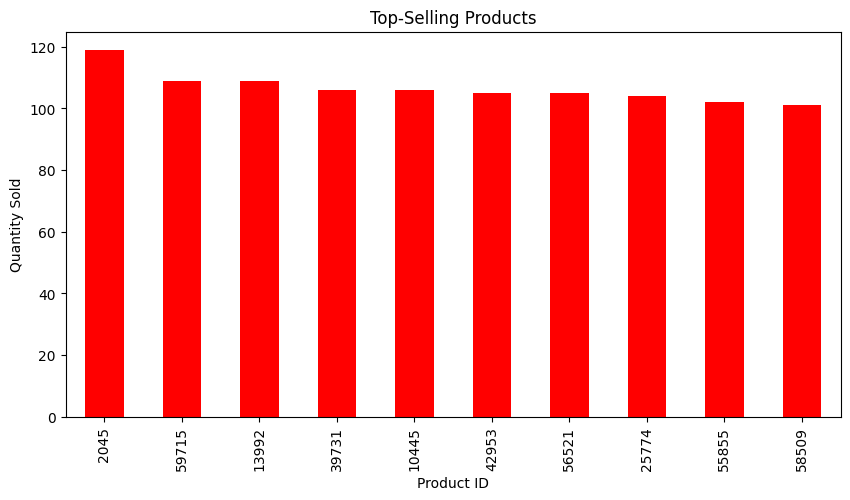

In [19]:
# Flatten product data
product_list = []
for row in transactions["product_metadata"].dropna():
    for item in row:
        product_list.append(item)

# Convert to DataFrame
products_df = pd.DataFrame(product_list)

# Aggregate sales by product_id
top_products = products_df.groupby("product_id")["quantity"].sum().sort_values(ascending=False).head(10)

# Plot top-selling products
plt.figure(figsize=(10, 5))
top_products.plot(kind="bar", color="red")
plt.xlabel("Product ID")
plt.ylabel("Quantity Sold")
plt.title("Top-Selling Products")
plt.show()

Customer who have done the max and min transaction

In [20]:
top_customers = transactions["customer_id"].value_counts().head(5)
print(top_customers)

customer_id
43202    550
29496    505
82237    503
10167    473
69740    458
Name: count, dtype: int64


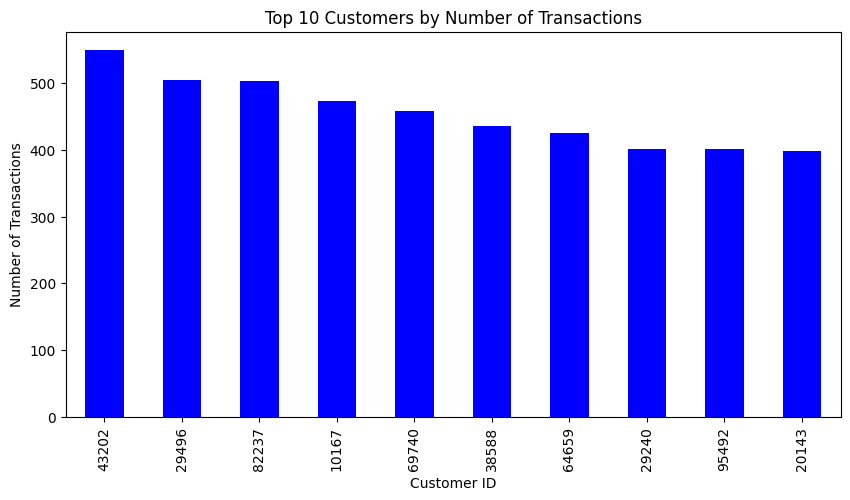

In [21]:
top_10_customers = transactions["customer_id"].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
top_10_customers.plot(kind="bar", color="blue")
plt.xlabel("Customer ID")
plt.ylabel("Number of Transactions")
plt.title("Top 10 Customers by Number of Transactions")
plt.show()

Highest Spending Customer

In [22]:
customer_spending = transactions.groupby("customer_id")["total_amount"].sum()
top_spenders = customer_spending.sort_values(ascending=False).head(5)
print(top_spenders)

customer_id
43202    320061849
29496    297669495
82237    256479120
64659    252443713
52130    251399384
Name: total_amount, dtype: int64


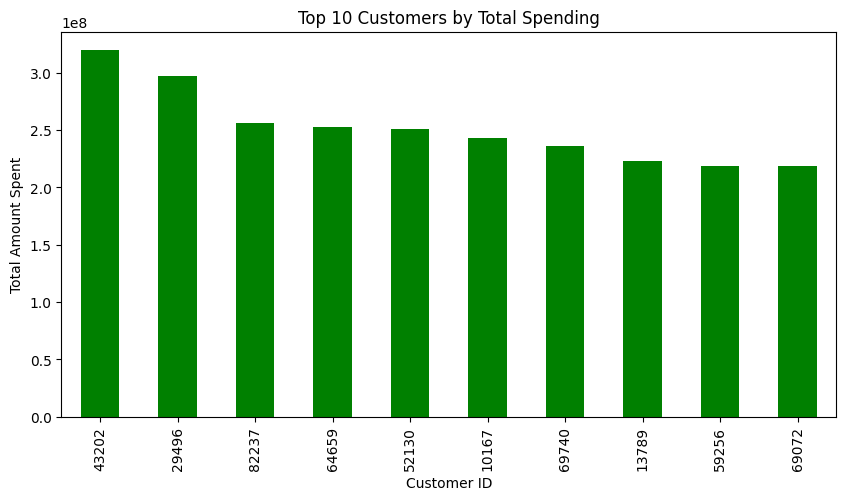

In [23]:
top_10_spenders = customer_spending.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
top_10_spenders.plot(kind="bar", color="green")
plt.xlabel("Customer ID")
plt.ylabel("Total Amount Spent")
plt.title("Top 10 Customers by Total Spending")
plt.show()

In [24]:
txn_exploded = transactions.explode('product_metadata')
txn_exploded = pd.concat([txn_exploded.drop(columns=["product_metadata"]),txn_exploded["product_metadata"].apply(pd.Series)], axis=1)

In [25]:
txn_exploded

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,total_amount,order_date,order_time,order_year,order_month,ship_date,ship_time,product_id,quantity,item_price
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,...,199832,2018-07-29,15:22:01.458193,2018,Jul,2018-08-03,05:07:24.812676,54728,1,191247
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03 01:29:03.415705+00:00,...,155526,2018-07-30,12:40:22.365620,2018,Jul,2018-08-03,01:29:03.415705,16193,1,145526
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18 08:41:49.422380+00:00,...,550696,2018-09-15,11:51:17.365620,2018,Sep,2018-09-18,08:41:49.422380,53686,4,135174
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05 17:42:27.954235+00:00,...,271012,2018-11-01,11:23:48.365620,2018,Nov,2018-11-05,17:42:27.954235,20228,1,271012
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23 17:24:07.361785+00:00,...,198753,2018-12-18,11:20:30.365620,2018,Dec,2018-12-23,17:24:07.361785,55220,1,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852579,2021-09-21 22:10:05.074873+00:00,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,Debit Card,Failed,0,NaN,0,2021-09-27 00:43:40.992167+00:00,...,226820,2021-09-21,22:10:05.074873,2021,Sep,2021-09-27,00:43:40.992167,30642,2,113410
852580,2021-12-09 07:35:18.222046+00:00,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12 07:52:44.803822+00:00,...,359203,2021-12-09,07:35:18.222046,2021,Dec,2021-12-12,07:52:44.803822,19394,1,354213
852581,2021-12-11 01:20:36.944593+00:00,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12 13:28:22.848703+00:00,...,1158159,2021-12-11,01:20:36.944593,2021,Dec,2021-12-12,13:28:22.848703,13079,4,288835
852582,2019-12-18 11:01:09.623382+00:00,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23 22:56:46.831720+00:00,...,184143,2019-12-18,11:01:09.623382,2019,Dec,2019-12-23,22:56:46.831720,11312,1,188646


In [26]:
successful_transactions = txn_exploded[txn_exploded["payment_status"] == "Success"]

successful_transactions = successful_transactions.dropna(subset=["promo_code"])

In [27]:
# Group by product_id and collect unique, sorted promo codes
promo_per_product = (
    successful_transactions.groupby("product_id")["promo_code"]
    .apply(lambda x: sorted(set(x)))  # Remove duplicates and sort
    .reset_index()
)
promo_per_product

,product_id,promo_code
0,1163,"[AZ2022, LIBURDONG, STARTUP, WEEKENDMANTAP, WE..."
1,1164,"[AZ2022, BUYMORE, STARTUP, WEEKENDMANTAP, XX2022]"
2,1165,"[AZ2022, STARTUP, WEEKENDMANTAP, WEEKENDSERU, ..."
3,1525,"[AZ2022, BUYMORE, WEEKENDSERU]"
4,1526,"[AZ2022, BUYMORE, LIBURDONG, SC2022, WEEKENDSE..."
...,...,...
44439,59995,"[AZ2022, BUYMORE, WEEKENDMANTAP, WEEKENDSERU]"
44440,59996,"[AZ2022, BUYMORE, LIBURDONG, WEEKENDSERU]"
44441,59998,"[AZ2022, BUYMORE, LIBURDONG, STARTUP, XX2022]"
44442,59999,"[AZ2022, BUYMORE, LIBURDONG, SC2022, WEEKENDSE..."


In [28]:
promo_per_product.to_csv("promo_per_product.csv", index=False)

In [29]:
customers_per_product = successful_transactions.groupby("product_id")["customer_id"].nunique().reset_index()
customers_per_product

,product_id,customer_id
0,1163,8
1,1164,6
2,1165,13
3,1525,7
4,1526,14
...,...,...
44439,59995,8
44440,59996,7
44441,59998,8
44442,59999,8


In [30]:
customers_per_product.to_csv("customers_per_product.csv", index=False)

## EDA click_steram

In [31]:
stream.head()                  

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri..."
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'}


In [32]:
stream['event_time'] = pd.to_datetime(stream['event_time'])

# Extract date, time, year, and abbreviated month name
stream['event_date'] = stream['event_time'].dt.date
stream['event_t'] = stream['event_time'].dt.time
stream['event_year'] = stream['event_time'].dt.year
stream['event_month'] = stream['event_time'].dt.strftime('%b')

In [33]:
stream.head()

,session_id,event_name,event_time,event_id,traffic_source,event_metadata,event_date,event_t,event_year,event_month
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06 15:54:32.821085+00:00,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN,2019-09-06,15:54:32.821085,2019,Sep
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06 16:03:57.821085+00:00,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN,2019-09-06,16:03:57.821085,2019,Sep
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01 12:05:10.322763+00:00,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN,2019-09-01,12:05:10.322763,2019,Sep
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01 12:06:33.322763+00:00,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri...",2019-09-01,12:06:33.322763,2019,Sep
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01 12:15:29.425431+00:00,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'},2019-09-01,12:15:29.425431,2019,Sep


In [34]:
stream_updated = stream.merge(transactions[["session_id",'customer_id']],on="session_id",how="left")

In [35]:
stream_updated 

,session_id,event_name,event_time,event_id,traffic_source,event_metadata,event_date,event_t,event_year,event_month,customer_id
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06 15:54:32.821085+00:00,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN,2019-09-06,15:54:32.821085,2019,Sep,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06 16:03:57.821085+00:00,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN,2019-09-06,16:03:57.821085,2019,Sep,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01 12:05:10.322763+00:00,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN,2019-09-01,12:05:10.322763,2019,Sep,18770.0
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01 12:06:33.322763+00:00,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri...",2019-09-01,12:06:33.322763,2019,Sep,18770.0
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01 12:15:29.425431+00:00,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'},2019-09-01,12:15:29.425431,2019,Sep,18770.0
...,...,...,...,...,...,...,...,...,...,...,...
12833597,ad1063b0-a6e5-40a9-aed6-d1b45741e571,SEARCH,2021-06-07 04:37:53.354381+00:00,4b3b91a5-9bda-44de-87dc-153367071dfc,MOBILE,{'search_keywords': 'Bekas'},2021-06-07,04:37:53.354381,2021,Jun,44381.0
12833598,64585e37-3fe7-48d7-b79b-ebcb70230eb2,HOMEPAGE,2021-05-05 11:44:14.985835+00:00,ab0acc87-9578-408a-b47f-c46996b8b52f,MOBILE,NaN,2021-05-05,11:44:14.985835,2021,May,83906.0
12833599,64585e37-3fe7-48d7-b79b-ebcb70230eb2,ADD_TO_CART,2021-05-05 11:53:10.985835+00:00,230d7b67-9934-42f9-9509-b330ac6ae777,MOBILE,"{'product_id': 19820, 'quantity': 1, 'item_pri...",2021-05-05,11:53:10.985835,2021,May,83906.0
12833600,64585e37-3fe7-48d7-b79b-ebcb70230eb2,BOOKING,2021-05-05 12:10:09.135142+00:00,8996ce49-c5dd-41ed-9231-28bfdb634cbe,MOBILE,{'payment_status': 'Success'},2021-05-05,12:10:09.135142,2021,May,83906.0


In [36]:
stream_updated['event_time'] = pd.to_datetime(stream_updated['event_time'])

In [37]:
# Event frequency
event_counts = stream_updated['event_name'].value_counts()
print("Event Frequency:\n", event_counts)

Event Frequency:
 event_name
CLICK          2498038
HOMEPAGE       2487126
ADD_TO_CART    1937157
SCROLL         1663571
ITEM_DETAIL    1290396
SEARCH         1173266
BOOKING         852582
PROMO_PAGE      604931
ADD_PROMO       326535
Name: count, dtype: int64


In [38]:
# Traffic source distribution
traffic_counts = stream_updated['traffic_source'].value_counts()
print("Traffic Source Distribution:\n", traffic_counts)

Traffic Source Distribution:
 traffic_source
MOBILE    11548304
WEB        1285298
Name: count, dtype: int64


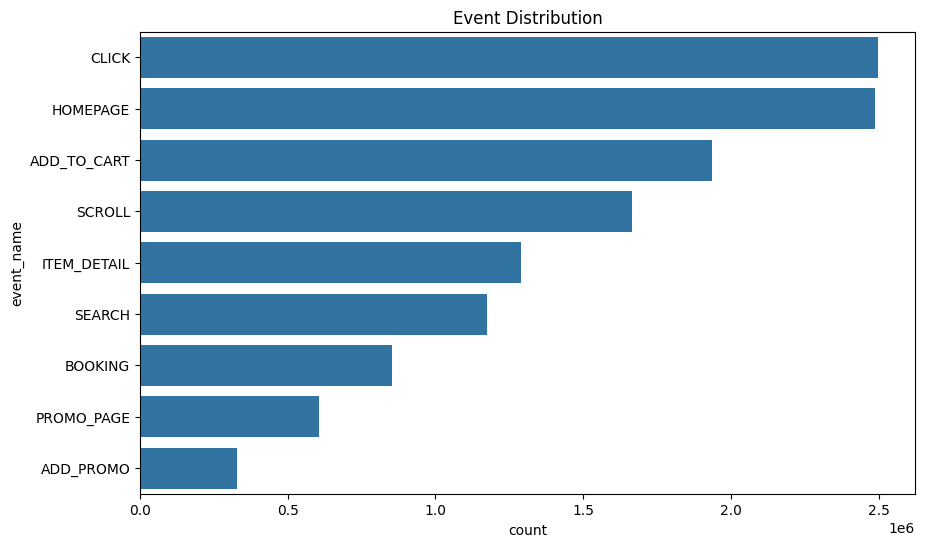

In [39]:
# Plot event distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='event_name', data=stream_updated, order=event_counts.index)
plt.title('Event Distribution')
plt.show()

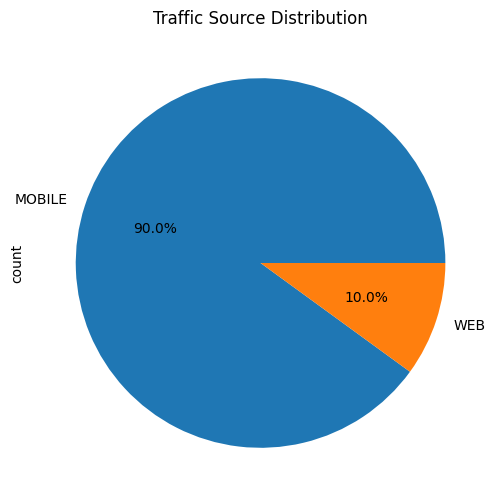

In [40]:
# Plot traffic source distribution
plt.figure(figsize=(6, 6))
traffic_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Traffic Source Distribution')
plt.show()

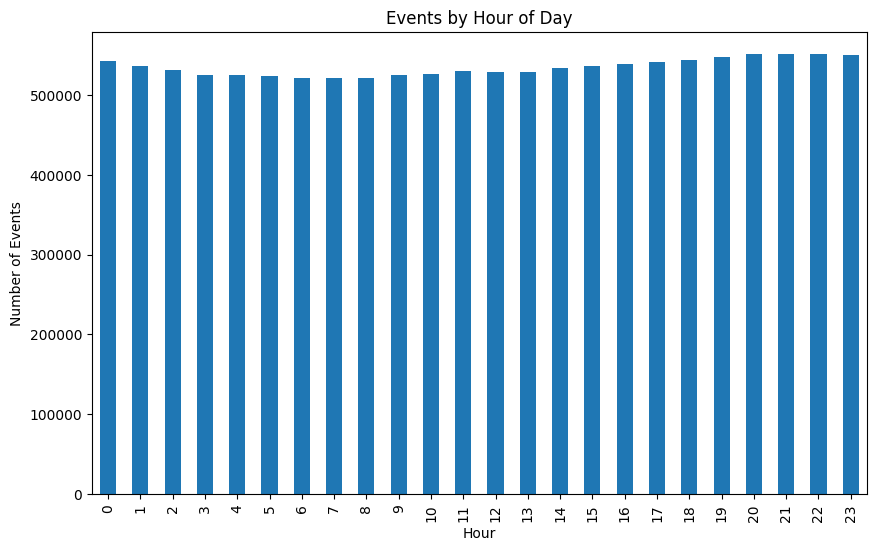

In [41]:
# Temporal analysis
stream_updated['hour'] =stream_updated['event_time'].dt.hour
hourly_events = stream_updated.groupby('hour').size()
plt.figure(figsize=(10, 6))
hourly_events.plot(kind='bar')
plt.title('Events by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Events')
plt.show()

In [42]:
# Total sessions
total_sessions = stream_updated['session_id'].nunique()

In [43]:
# Successful bookings
successful_bookings = stream_updated[(stream_updated['event_name'] == 'BOOKING') & 
    (stream_updated['event_metadata'].str.contains('Success', na=False))]['session_id'].nunique()

In [44]:
# Conversion rate
conversion_rate = (successful_bookings / total_sessions) * 100
print(f"Conversion Rate: {conversion_rate:.2f}%")

Conversion Rate: 91.15%


In [45]:
# Step 2: Customer Journey Analysis
# Filter sessions with successful bookings
successful_sessions = stream_updated[stream_updated['session_id'].isin(
    stream_updated[(stream_updated['event_name'] == 'BOOKING') & 
         (stream_updated['event_metadata'].str.contains('Success', na=False))]['session_id'])]

In [46]:
# Extract event sequences for successful sessions
event_sequences = successful_sessions.groupby('session_id')['event_name'].apply(list)

In [47]:
# Print example sequences
print("Example Event Sequences:")
for seq in event_sequences.head():
    print(seq)

Example Event Sequences:
['HOMEPAGE', 'ADD_TO_CART', 'BOOKING', 'HOMEPAGE', 'CLICK', 'CLICK', 'ITEM_DETAIL', 'SCROLL']
['HOMEPAGE', 'ADD_TO_CART', 'BOOKING', 'PROMO_PAGE']
['HOMEPAGE', 'ADD_TO_CART', 'BOOKING', 'PROMO_PAGE']
['HOMEPAGE', 'ADD_TO_CART', 'BOOKING', 'CLICK', 'SCROLL', 'SEARCH', 'CLICK', 'HOMEPAGE', 'SEARCH', 'HOMEPAGE', 'ITEM_DETAIL', 'CLICK', 'PROMO_PAGE', 'SEARCH', 'CLICK', 'ITEM_DETAIL', 'SCROLL', 'ITEM_DETAIL', 'SEARCH', 'CLICK', 'SCROLL', 'CLICK', 'CLICK', 'SCROLL', 'SCROLL', 'ITEM_DETAIL', 'ITEM_DETAIL', 'HOMEPAGE', 'ITEM_DETAIL', 'ITEM_DETAIL', 'CLICK', 'HOMEPAGE', 'CLICK', 'SCROLL', 'SCROLL', 'SCROLL', 'CLICK', 'CLICK', 'SEARCH', 'HOMEPAGE', 'CLICK', 'SCROLL', 'CLICK', 'CLICK', 'CLICK', 'SEARCH', 'SEARCH', 'SCROLL', 'SEARCH', 'SEARCH', 'CLICK', 'CLICK', 'HOMEPAGE', 'CLICK', 'SEARCH', 'CLICK', 'ITEM_DETAIL', 'SCROLL', 'SEARCH', 'HOMEPAGE', 'HOMEPAGE', 'SCROLL', 'CLICK', 'CLICK', 'CLICK', 'CLICK']
['HOMEPAGE', 'ADD_TO_CART', 'ADD_PROMO', 'BOOKING', 'CLICK', 'CLICK',

/var/folders/4s/v2k7bm2d7vl1z46yc265hz3c0000gn/T/ipykernel_84458/4045814872.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='event_name', data=funnel_data, palette='viridis')


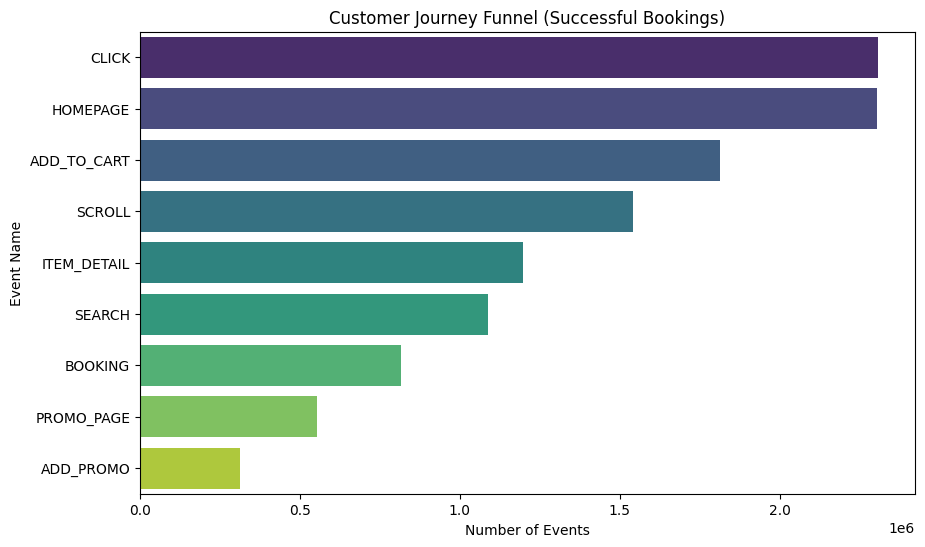

In [48]:
# Count occurrences of each event in successful sessions
funnel_data = successful_sessions['event_name'].value_counts().reset_index()
funnel_data.columns = ['event_name', 'count']

# Sort by count
funnel_data = funnel_data.sort_values(by='count', ascending=False)

# Plot funnel
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='event_name', data=funnel_data, palette='viridis')
plt.title('Customer Journey Funnel (Successful Bookings)')
plt.xlabel('Number of Events')
plt.ylabel('Event Name')
plt.show()